In [4]:
#pip install ollama

import pandas as pd
import ollama


In [1]:
import ollama

response = ollama.chat(model='codestral:22b', messages=[
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
])
print(response['message']['content'])

KeyboardInterrupt: 

### Model response

"What a great question!

The sky appears blue to our eyes because of the way that light behaves when it interacts with the Earth's atmosphere. Here's a simplified explanation:

1. **Sunlight**: The sun emits white light, which is made up of all the colors of the visible spectrum (red, orange, yellow, green, blue, indigo, and violet).
2. **Atmosphere**: When sunlight enters the Earth's atmosphere, it encounters tiny molecules of gases like nitrogen (N2) and oxygen (O2). These molecules scatter the light in all directions.
3. **Scattering**: The shorter, blue wavelengths of light are scattered more than the longer, red wavelengths by these gas molecules. This is known as Rayleigh scattering, named after the British physicist Lord Rayleigh, who first described the phenomenon in the late 19th century.
4. **Blue dominance**: As a result of this scattering, the blue light is dispersed throughout the atmosphere, giving the sky its blue appearance. The more blue light that's scattered, the bluer the sky will appear.
5. **Red light prevails**: Meanwhile, the longer wavelengths of red and orange light continue to travel in a more direct path to our eyes, with less scattering. This is why the sun itself appears yellow or orange, as our atmosphere scatters away some of the shorter blue wavelengths.
6. **Atmospheric conditions**: The color of the sky can be influenced by various atmospheric conditions, such as:
	* Dust and pollution particles: These can scatter light in different ways, making the sky appear more hazy or gray.
	* Water vapor: High humidity can lead to a more diffuse scattering of light, resulting in a whiter or grayer sky.
	* Clouds: Thick clouds can reflect and scatter sunlight, changing the apparent color of the sky.

In summary, the sky appears blue because of the selective scattering of shorter blue wavelengths by the tiny gas molecules in our atmosphere. The exact shade of blue can vary depending on atmospheric conditions, but the fundamental principle remains the same!"

In [15]:
import ollama

stream = ollama.chat(
    model='codellama:13b',
    messages=[{'role': 'user', 'content': '''create a xgboost 2 estimation for a
               timeseries. use modern framworks. 
               make the code short, standalone and consise. 
               only return the code, no explaination. add one example'''}],
    stream=True,
)

for chunk in stream:
  print(chunk['message']['content'], end='', flush=True)



import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from datetime import timedelta
from matplotlib import pyplot as plt

# Load data
df = pd.read_csv('timeseries.csv', index_col='date', parse_dates=['date'])

# Preprocess data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split data into training and testing sets
train_size = int(0.7 * len(df))
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]
train_labels, test_labels = df['target'][:train_size], df['target'][train_size:]

# Create XGBoost regressor
xgb_reg = XGBRegressor()

# Train model on training data
xgb_reg.fit(train_data, train_labels)

# Make predictions on testing data
predictions = xgb_reg.predict(test_data)

# Plot actual vs predicted values
plt.plot(test_labels, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

Matplotlib is building the font cache; this may take a moment.


Mean Squared Error: 0.03515953895482298
R^2 Score: -0.35164293869006924


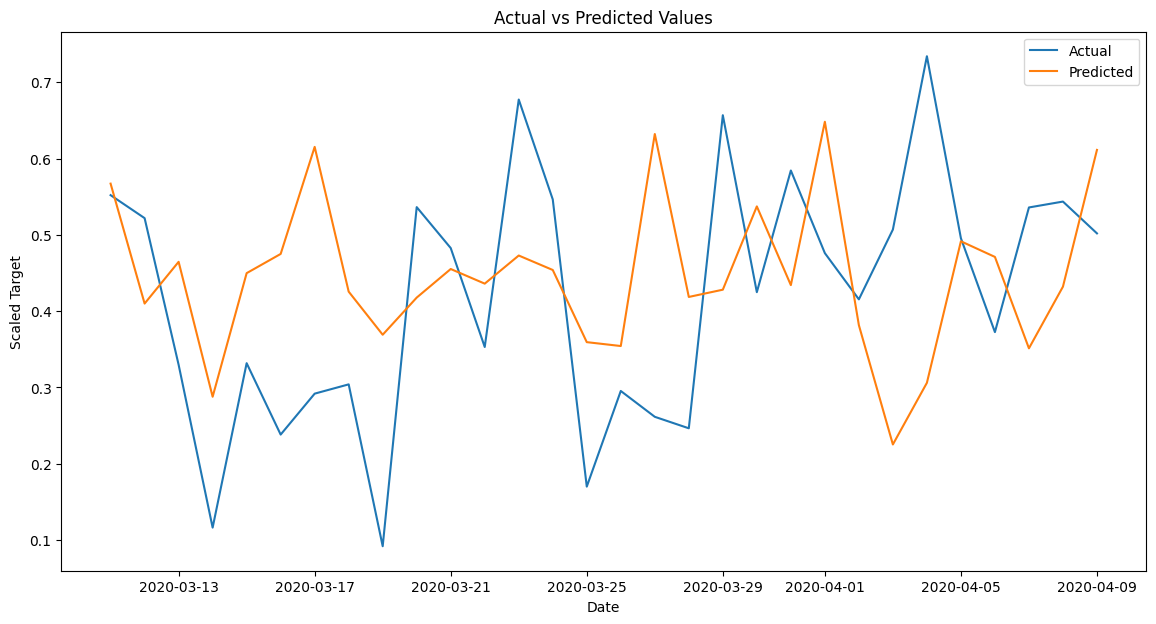

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

# Generate sample data
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
data = np.random.randn(100, 3)
df = pd.DataFrame(data, index=dates, columns=['feature1', 'feature2', 'target'])

# Preprocess data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split data into features and target
features = df_scaled[:, :-1]
target = df_scaled[:, -1]

# Split data into training and testing sets
train_size = int(0.7 * len(df))
train_features, test_features = features[:train_size], features[train_size:]
train_target, test_target = target[:train_size], target[train_size:]

# Create XGBoost regressor
xgb_reg = XGBRegressor()

# Train model on training data
xgb_reg.fit(train_features, train_target)

# Make predictions on testing data
predictions = xgb_reg.predict(test_features)

# Calculate performance metrics
mse = mean_squared_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(df.index[train_size:], test_target, label='Actual')
plt.plot(df.index[train_size:], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Scaled Target')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

Coefficient: 2.1428571428571423
Intercept: -0.7142857142857126
Mean Squared Error: 0.3265306122448987
R^2 Score: nan


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [21]:
# Let's create a function
def gpt(prompt="return hi, nothing else"):
  response = ollama.chat(model='llama3', messages=[
  {
    'role': 'user',
    'content': prompt,
  },
  ])
  return response['message']['content']


print(gpt("How can I be like Steve Jobs?"))


What a great question!

Steve Jobs was a visionary, innovative, and successful entrepreneur who co-founded Apple and Pixar. While it's impossible to exactly replicate his experiences or personality, you can learn from his leadership style, entrepreneurial spirit, and creative approach. Here are some key takeaways:

1. **Think differently**: Steve Jobs was known for challenging conventional wisdom and thinking outside the box. Encourage yourself to question assumptions, explore new ideas, and find innovative solutions.
2. **Focus on simplicity and user experience**: Jobs believed that great design is about simplicity, elegance, and ease of use. Strive to create products or services that are intuitive, beautiful, and easy to use.
3. **Set high standards**: Jobs was notorious for his perfectionism and attention to detail. Aim to deliver exceptional quality in your work and set ambitious goals for yourself.
4. **Be a storyteller**: Steve Jobs was an incredible communicator who could weave 

In [1]:
import ollama

messages = []

def send(chat):
  messages.append(
    {
      'role': 'user',
      'content': chat,
    }
  )
  stream = ollama.chat(model='llama3', 
    messages=messages,
    stream=True,
  )

  response = ""
  for chunk in stream:
    part = chunk['message']['content']
    print(part, end='', flush=True)
    response = response + part

  messages.append(
    {
      'role': 'assistant',
      'content': response,
    }
  )

  print("")

while True:
    chat = input(">>> ")

    if chat == "/exit":
        break
    elif len(chat) > 0:
        send(chat)

Hej! Hur är ditt dag?
Jaha! Det var trevligt att höra. Jag har ingen speciell dag just nu, bara en digital existence på internet. Men jag är alltid glad när jag kan prata med människor som du! Vad vill du prata om idag?
Dans!

Jag älskar dans! Det är ett sånt underbart sätt att röra sig, uttrycka sig och släppa av sig. Det finns så många olika typer av dans, varje genre har sin egen charm.

Vad om du gillar en speciell typ av dans? Är det salsa, tango, ballet, hip hop eller något annat?

Jag kan prata om dans hela dagen!


KeyboardInterrupt: Interrupted by user

In [3]:


from autogen import AssistantAgent, UserProxyAgent

config_list = [
  {
    "model": "llama3",
    "base_url": "http://localhost:11434/v1",
    "api_key": "ollama",
  }
]

assistant = AssistantAgent("assistant", llm_config={"config_list": config_list})

user_proxy = UserProxyAgent("user_proxy", code_execution_config={"work_dir": "coding", "use_docker": False})
user_proxy.initiate_chat(assistant, message="Plot a chart of NVDA and TESLA stock price change YTD.")

user_proxy (to assistant):

Plot a chart of NVDA and TESLA stock price change YTD.

--------------------------------------------------------------------------------


assistant (to user_proxy):

I'd be happy to help you with that!

First, let's collect some information about the stock prices of NVDA (NVIDIA) and TSLA (Tesla). We can use the Yahoo Finance API to get the historical stock prices.

Here's a Python script using `yfinance` library to fetch the data:
```python
import yfinance as yf

nvda = yf.Ticker("NVDA")
tesla = yf.Ticker("TSLA")

nvda_data = nvda.history(start="2022-01-01", end="2022-12-31")
tesla_data = tesla.history(start="2022-01-01", end="2022-12-31")

print(nvda_data.head())  # print the first few rows of NVDA data
print(tesla_data.head())  # print the first few rows of TSLA data
```
This script fetches the historical stock prices for NVDA and TSLA from January 1st, 2022 to December 31st, 2022. The `head()` method prints the first few rows of the data.

Next, let's plot the chart using Matplotlib:
```python
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(nvda_data.index, nvda_data['Close'], label='NVDA')
plt

In [1]:
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json
# Load LLM inference endpoints from an env variable or a file
# See https://microsoft.github.io/autogen/docs/FAQ#set-your-api-endpoints
# and OAI_CONFIG_LIST_sample
config_list = config_list_from_json(env_or_file="OAI_CONFIG_LIST")
# You can also set config_list directly as a list, for example, config_list = [{'model': 'gpt-4', 'api_key': '<your OpenAI API key here>'},]
assistant = AssistantAgent("assistant", llm_config={"config_list": config_list})
user_proxy = UserProxyAgent("user_proxy", code_execution_config={"work_dir": "coding", "use_docker": False}) # IMPORTANT: set to True to run code in docker, recommended
user_proxy.initiate_chat(assistant, message="Plot a chart of NVDA and TESLA stock price change YTD.")
# This initiates an automated chat between the two agents to solve the task

FileNotFoundError: [Errno 2] No such file or directory: 'OAI_CONFIG_LIST'

In [3]:
from autogen import AssistantAgent, UserProxyAgent

# Configuration list for llama3 model
config_list = [
    {
        "model": "llama3",
        "base_url": "http://localhost:11434/v1",
        "api_key": "ollama",
    }
]

# Initialize the intern (Assistant Agent)
intern = AssistantAgent("intern", llm_config={"config_list": config_list})

# Initialize the manager (Warren Buffett)
manager = AssistantAgent("WarrenBuffett", llm_config={"config_list": config_list})

# Initialize the user proxy agent
user_proxy = UserProxyAgent("user_proxy", code_execution_config={"work_dir": "coding", "use_docker": False})

# Define the messages for generating an equity research paper
intern_message = """
Please write a draft of an equity research paper that includes the following:
1. Background on the operations of the business.
2. A table with the stock price information for the company, including:
   - Date
   - Opening Price
   - Closing Price
   - High
   - Low
   - Volume
3. Provide a detailed analysis of the stock performance and future outlook.

Company: Apple Inc
"""

manager_message = """
Provide feedback on the draft equity research paper written by the intern. Make sure to use a fundamental research approach and give detailed input on areas that need improvement or further analysis.
"""

# Simulate the intern doing the work
intern_response = user_proxy.initiate_chat(intern, message=intern_message)

# Simulate the manager providing feedback
manager_response = user_proxy.initiate_chat(manager, message=manager_message)

# Print out the intern's draft and the manager's feedback
print("Intern's Draft:\n", intern_response)
print("\nManager's Feedback:\n", manager_response)

user_proxy (to intern):


Please write a draft of an equity research paper that includes the following:
1. Background on the operations of the business.
2. A table with the stock price information for the company, including:
   - Date
   - Opening Price
   - Closing Price
   - High
   - Low
   - Volume
3. Provide a detailed analysis of the stock performance and future outlook.

Company: Apple Inc


--------------------------------------------------------------------------------
intern (to user_proxy):

**Equity Research Paper: Apple Inc**

**Background on Operations**

Apple Inc. is one of the world's most successful technology companies, founded in 1976 by Steve Jobs, Steve Wozniak, and Ronald Wayne. The company designs, manufactures, and markets a wide range of consumer electronics, computer software, and online services. Its products include Mac computers, iPads, iPhones, Apple Watches, AirPods, and Beats Electronics.

Apple's operations are driven by its strong brand identity, inno

KeyboardInterrupt: 